# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 8. Оценки параметров.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash; 30 баллов
* Задача 4 &mdash; 50 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [1]:
# Bot check

# HW_ID: fpmi_ad8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px
sns.set(style='whitegrid', font_scale=1.2, palette='Set2')

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/estimators.html">ноутбук</a> с занятия по оценкам параметров.


---
### Задача 1.

Найдите оценку параметра $\theta$ методом моментов по выборке размера $n$ из распределения:
* $U(a, b), \theta=(a, b)$; 
* $Pois(\theta)$;
* $\mathcal{N}(a, \sigma^2), \theta=(a, \sigma)$.

Выводить характеристики вероятностных распределений (мат. ожидание, дисперсия) не требуется.

- $U(a,b)$:  
Пусть $X \sim U(a, b) \Rightarrow$  
$EX = (b+a)/2$  
$DX = (b-a)^2/12 \Rightarrow EX^2 = DX + (EX)^2 = \frac{a^2 + ab + b^2}{3}$  

Метод моментов:  

$\newcommand{\av}[1]{\overline{#1}}$

$$ \left\{
\begin{array}{lr}
(b+a)/2 = \frac{1}{n}\sum\limits_{i=1}^{n}x_i = \overline{X} \text{    }(1)\\
\frac{a^2 + ab + b^2}{3} = \frac{1}{n}\sum\limits_{i=1}^{n}{x_i}^2 = \overline{X^2} \text{    }  (2)
\end{array}
\right. $$
Тогда  
$3(2) - 4(1)^2 = ab = 3\av{X^2} - 4\av{X}^2$ решая совместно с (1)  
$a, b = \av{X} \mp \sqrt{5\av{X}^2 - 3\av{X^2}}$

- $Pois(\theta)$:  
Пусть $X \sim Pois(\theta) \Rightarrow$  
$EX = \theta$  
Метод моментов:  
$\theta = \av{X}$ - это и ответ

- $N(a,\sigma^2)$:  
Пусть $X \sim N(a, \sigma^2) \Rightarrow$  
$EX = a$  
$DX = \sigma^2 \Rightarrow EX^2 = DX + (EX)^2 = \sigma^2 + a^2$  

Метод моментов:  

$$ \left\{
\begin{array}{lr}
a = \overline{X} \text{    }(1)\\
\sigma^2 + a^2 = \av{X^2} \text{    }(2)
\end{array}
\right. $$
Тогда  
$\theta = (a, \sigma^2) = (\av{X}, \av{X^2} - \av{X}^2)$


---
### Задача 2.

Являются ли сильно состоятельными оценки, полученные в предыдущей задаче?

Для равномерного распределения *достаточно* выполнить визуальную проверку, в остальных случаях &mdash; *необходимо* привести теоретическое доказательство, используя известные вам теоретические утверждения.
- Да являются по ЗБЧ $\av{X} \xrightarrow{\text{п.н.}} EX$, а применяя ЗБЧ к $Y = X^2$: $\av{X^2} \xrightarrow{\text{п.н.}} EX^2$ - все сходимости для соответствующих $\cal{P}_{\theta}$ 
Так что все оценки в выкладках выше сильносостоятельные оценки $\theta$

---
### Задача 3.   

**a).** Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно. 
Рассмотрим оценку $S^2 = \overline{X^2}-\overline{X}^2$ дисперсии $\sigma^2$.

Докажите, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$.

**b).** Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Иначе говоря, какое бы ни оказалось истинное значение параметра $\theta$ рассматривая оценку $\widehat{\theta}$ в среднем будем получать именно $\theta$.

Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

*Подсказка.* Посчитайте математическое ожидание случайной величины $S^2$. Используйте для этого известные вам свойства математического ожидания.

a) $\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2 = \frac1n\sum\limits_{i=1}^n({X_i}^2 - 2X_i\av{X} + \av{X}^2) = \frac1n(\sum\limits_{i=1}^n{X_i}^2 - 2\av{X}\sum\limits_{i=1}^nX_i + \sum\limits_{i=1}^n\av{X}^2) = \av{X^2} - 2\av{X}^2 + \av{X}^2 = \av{X^2} - \av{X}^2$.

b)$ES^2 = E\av{X^2} - E{\av{X}^2} = \frac1n\sum\limits_{i=1}^nE{X_i}^2 - \frac1{n^2}E(\sum\limits_{i=1}^nX_i)^2 = E{X_1}^2 - \frac1{n^2}\sum\limits_{i=1}^nE{X_i} - \frac1{n^2}\sum\limits_{i\neq j \in \{1, ..., n\}}^{n}E(X_iX_j) = \frac{n-1}{n}E{X_1}^2 - \frac{n(n-1)}{n^2}(EX_1)^2 = \frac{n-1}n(E{X_1}^2 - (EX_1)^2) = \frac{n-1}{n}\sigma^2 \neq \sigma^2 $ оценка не несмещенна 

 ---
### Задача 4.   
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?

Поскольку $ES^2 = \frac{n-1}n\sigma^2 \Rightarrow E\frac n{n-1}S^2 = \sigma^2$

**Ответ:** $S^2 - не несмещенная, а \frac n{n-1}S^2 - несмещенная$ 

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, \sigma^2)$. Для генерации выберите какое-то истинное значение $\sigma$. Далее вычислите среднее этих оценок, которое обозначим $\widetilde{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\widetilde{\theta}, y)$, где $y$ &mdash; произвольные различные (например, 0 и 1) координаты для двух различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/lecture2_2.pdf">презентацию</a> по оформлению домашних заданий. **Если график чему-то не удовлетворяет, оценка будет снижена.**

Вместо использования `matplotlib` можно также строить графики с помощью `plotly`, отправляя также html-версию графика.

In [3]:
k = 500 
sample_size = 10
sigma = 10

Генерируем выборки по строкам

In [4]:
def generate_samples(k, n, sigma):
    return sps.norm(0, sigma).rvs(size = (k, n))

In [5]:
samples = generate_samples(k, sample_size, sigma)

Считаем оценки:

In [6]:
standart_S = np.mean(samples * samples, axis=1) - (np.mean(samples, axis = 1))**2
other_S = (sample_size/(sample_size-1))*standart_S

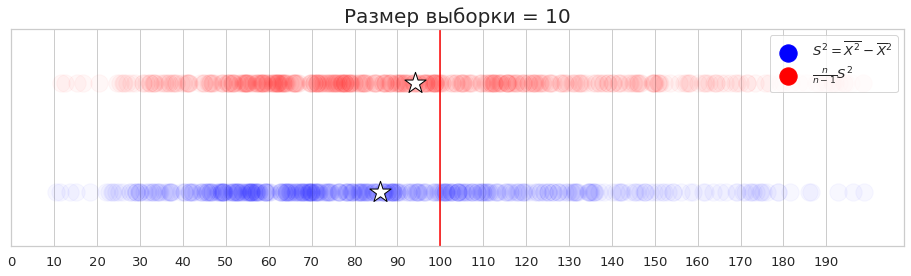

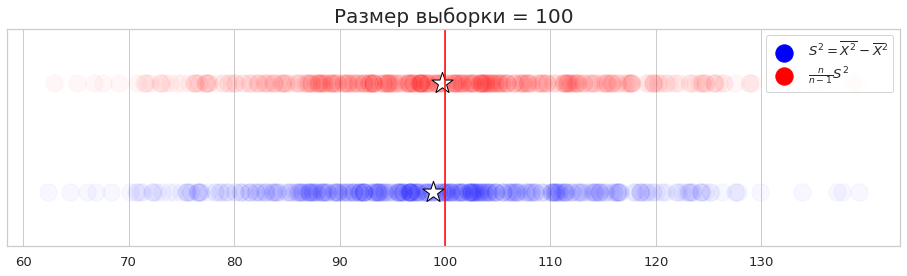

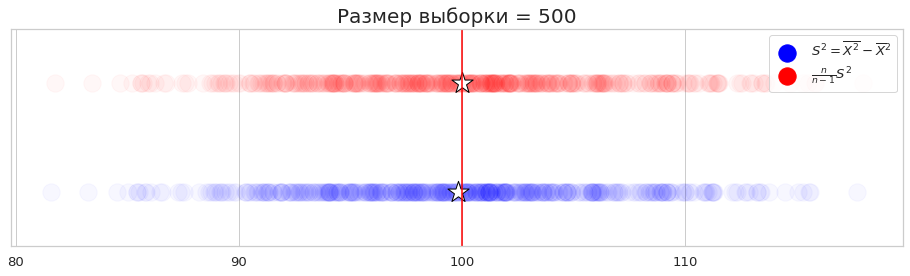

In [7]:
def compare_plots(size, segm):
    samples = generate_samples(k, size, sigma)
    standart_S = np.mean(samples * samples, axis=1) - (np.mean(samples, axis = 1))**2
    other_S = (size/(size-1))*standart_S
 
    standart_S = np.array(list(filter(lambda x:segm[0] < x < segm[1], standart_S)))
    other_S = np.array(list(filter(lambda x: segm[0] < x < segm[1], other_S)))
    # определите график размера 15 на 3
    fig = plt.figure(figsize=(16, 4))
    plt.gcf().tight_layout(pad=100)
    
    y = 0
    ax1 = plt.scatter(standart_S , np.zeros(standart_S.shape[0]) + y, 
            alpha=1, s=300, color='blue', label=fr'$S^2 = \overline{{X^2}}-\overline{{X}}^2$')
    
    plt.scatter(standart_S.mean(), y, marker='*', s=500, 
            color='w', edgecolors='black')
    y+=1
    
    ax2 = plt.scatter(other_S , np.zeros(other_S.shape[0]) + y, 
                alpha=1, s=300, color='red', label=fr'$\frac{{n}}{{n-1}}S^2$')
    plt.scatter(other_S.mean(), y, marker='*', s=500, 
            color='w', edgecolors='black')
    
    
    plt.vlines(sigma * sigma, -1, 2, color='r')
    plt.title(f'Размер выборки = {size}', fontsize = 20)
    plt.yticks([])
    plt.ylim([-0.5, 1.5])
    plt.xticks(np.arange(segm[0], segm[1], step = 10))
    plt.legend(handles = [ax1, ax2], loc = 'upper right')
    ax1.set_alpha(0.03)
    ax2.set_alpha(0.03)
    plt.show()

for segm, size in zip([[0, 200], [60, 140], [80, 120]], [10, 100, 500]):
    compare_plots(size, segm)

Вывод: 
- оценка с множителем $\frac{n}{n-1}$ на всех графиках находится не дальше, а при маленькой выборке заметно ближе чем обычная(синяя)  
- обе оценки с ростом n приближаются к $\sigma^2$
- с ростом n оценки бле плотнее расположены около $\sigma^2$

**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\widetilde{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя <a href="https://miptstats.github.io/courses/python/05_numpy.html#2.1-Математические-операции">функции</a> из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено. 

**Решение:**

Сгенерируем выборку максимального размера и рассматривая подматрицы найдем для кажого n соответствующее среднее

In [29]:
max_size = 1000 
max_samples = generate_samples(k, max_size, sigma) 
grid = np.linspace(1, max_size, max_size, dtype = int)
def count_average_val(samples : np.ndarray):
    squares_averages = np.cumsum(samples * samples, axis = 1)/grid
    averages = np.cumsum(samples, axis=1)/grid
    return np.mean(squares_averages - averages**2, axis = 0)

standart_S_averages = count_average_val(max_samples)[1:]
other_S_averages = standart_S_averages*(grid[1:]/(grid-1)[1:])

Построим график среднего значения от величины оценки в зависимости от размер выборки начиная n = 5

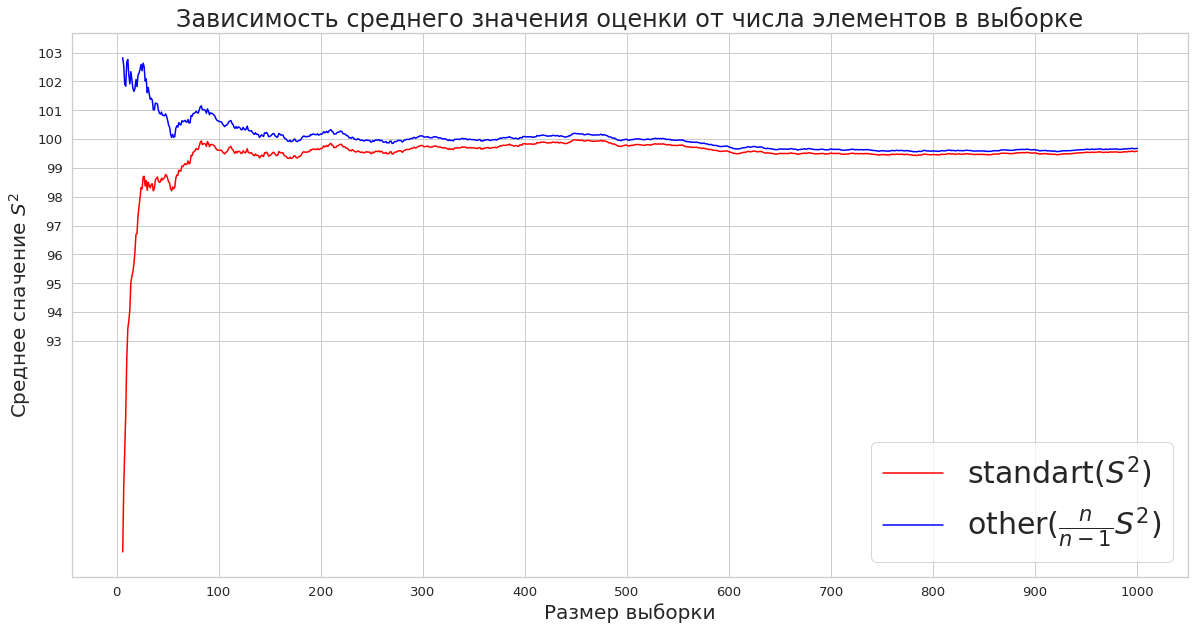

In [36]:
plt.figure(figsize = (20, 10))
begin = 5 
plt.plot(grid[begin:], standart_S_averages[begin-1:], c = 'red', label = r'standart($S^2$)')
plt.plot(grid[begin:], other_S_averages[begin-1:], c = 'blue', label = r'other($\frac{n}{n-1}S^2$)')
plt.legend(fontsize = 30)
plt.title("Зависимость среднего значения оценки от числа элементов в выборке", fontsize = 24)
plt.xlabel("Размер выборки", fontsize = 20)
plt.ylabel(r"Среднее сначение $S^2$", fontsize = 20)
plt.yticks(np.arange(93, 104, 1))
plt.xticks(np.arange(0, 1100, 100))
plt.show()

Теперь тот же график но начиная с n = 20

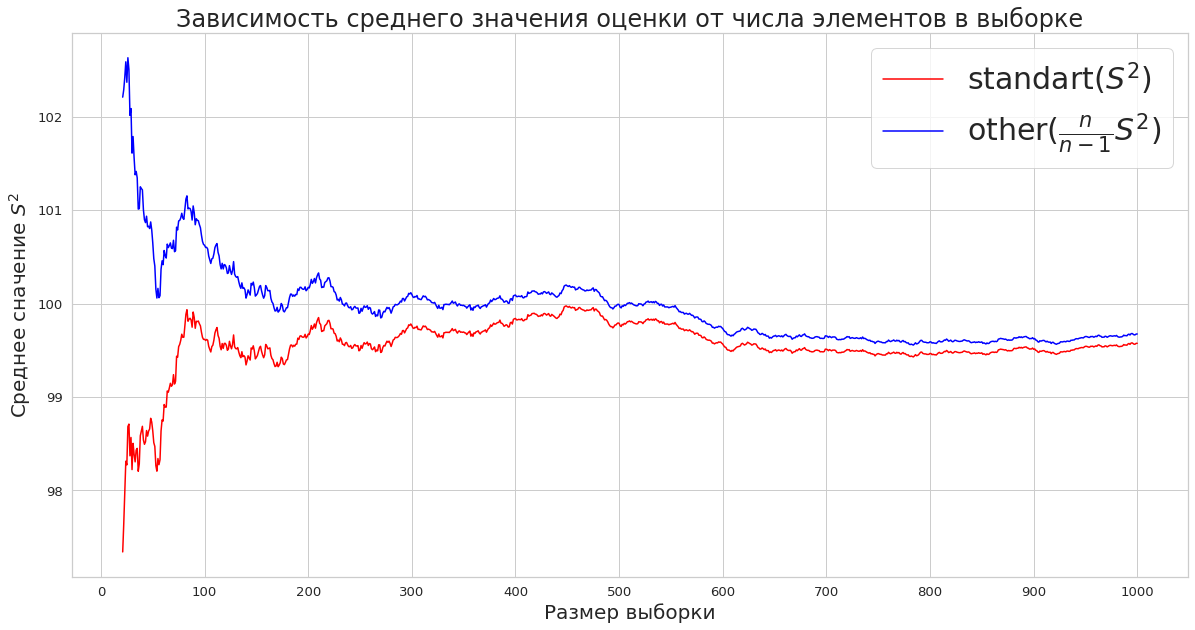

In [40]:
plt.figure(figsize = (20, 10))
begin = 20
plt.plot(grid[begin:], standart_S_averages[begin-1:], c = 'red', label = r'standart($S^2$)')
plt.plot(grid[begin:], other_S_averages[begin-1:], c = 'blue', label = r'other($\frac{n}{n-1}S^2$)')
plt.legend(fontsize = 30)
plt.title("Зависимость среднего значения оценки от числа элементов в выборке", fontsize = 24)
plt.xlabel("Размер выборки", fontsize = 20)
plt.ylabel(r"Среднее сначение $S^2$", fontsize = 20)
plt.xticks(np.arange(0, 1100, step = 100))
plt.show()

И такой с n = 100

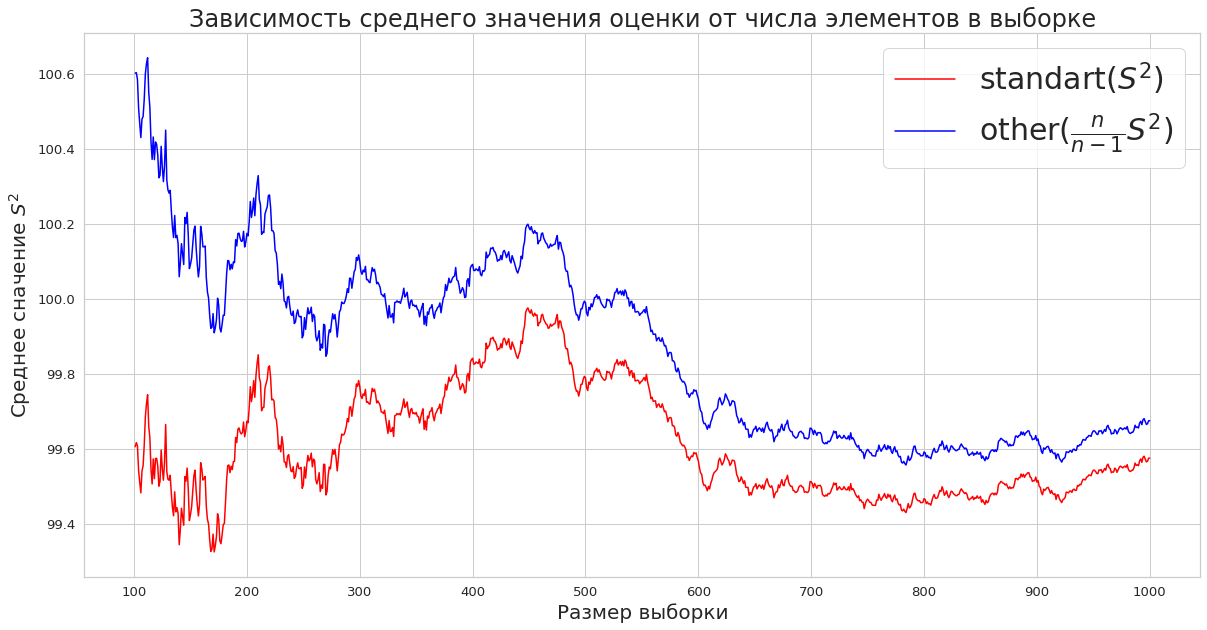

In [42]:
plt.figure(figsize = (20, 10))
begin = 100
plt.plot(grid[begin:], standart_S_averages[begin-1:], c = 'red', label = r'standart($S^2$)')
plt.plot(grid[begin:], other_S_averages[begin-1:], c = 'blue', label = r'other($\frac{n}{n-1}S^2$)')
plt.legend(fontsize = 30)
plt.title("Зависимость среднего значения оценки от числа элементов в выборке", fontsize = 24)
plt.xlabel("Размер выборки", fontsize = 20)
plt.ylabel(r"Среднее сначение $S^2$", fontsize = 20)
plt.xticks(np.arange(100, 1100, step = 100))
plt.show()

Краткие выводы:  
- синий график часто находится ближе к искомой $\sigma^2$  
- оба графика приближаются к $\sigma^2$ с ростом n  

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

*Замечание.* Для ответа на вопрос достаточно понимания текущего материала, ничего из физики знать не требуется.

**Вывод:** 

- Оценка несмещенная явным образом лучше чем стандартная  
- на лабороторных по физике так проис походит возможно потому, что число измерений начитывает не более пары десятков, и оценка несмещенная "сходится" к нужному результату быстрее, что и позволяет ее точнее оценить т.к. при малых измерениях дробь $\frac{n}{(n-1)}$ может вносить весомый вклад в ответ и можно гарантировать что с данным множителем теор гипотеза может быть проверена нагляднее.

*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.